In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mcolors
from datetime import datetime
import numpy as np

In [2]:
read_file = pd.read_excel ('E:\Bolsistas\Moisés\Codes\Analise_dados\dados\Dados Certos\DoisLinks\Rodada33\PWLogger_2022-06-13_11-19-34(0).xls', sheet_name='Neighbors')
read_file.to_csv ('E:\Bolsistas\Moisés\Codes\Analise_dados\pwlogger.csv', index = None, header=True)

In [3]:
#Leitura e conversão de tempo do dataframe de controle
data = pd.read_csv('E:\Bolsistas\Moisés\Codes\Analise_dados\dados.csv')
data['Date'] = pd.to_datetime(data['Date'])

#Leitura e conversão de t empo do dataframe de rede
rede = pd.read_csv('E:\Bolsistas\Moisés\Codes\Analise_dados\pwlogger.csv')
rede['Date'] = pd.to_datetime(rede['Date'])

rede = rede.set_index('Date')
data = data.set_index('Date')
df = data.merge(rede, right_index = True,left_index = True, how = 'outer')

#Leitura e conversão de tempo do dataframe de controle
data = pd.read_csv('E:\Bolsistas\Moisés\Codes\Analise_dados\dados.csv')
data['Date'] = pd.to_datetime(data['Date'])

#Leitura e conversão de t empo do dataframe de rede
rede = pd.read_csv('E:\Bolsistas\Moisés\Codes\Analise_dados\pwlogger.csv')
rede['Date'] = pd.to_datetime(rede['Date'])

In [4]:
rodada = 0
indicie_rede = 0
completo = pd.DataFrame()
for indicie, linha in df.iterrows():
    if np.isnan(linha['LV1']):
        #print('nulo')
        indicie_rede += 1
        if rodada == 0:  
            indicie_rede = 0
            rodada = 1  
        
    else:
        completo = completo.append(rede.loc[indicie_rede], ignore_index= True)
        #print(indicie_rede)
   
completo = completo.drop('Date', axis=1)

df = data.merge(completo, left_index=True, right_index=True, how = 'outer')
#df.to_csv('DadosCompletos.csv')
df

C:\Users\Corvette\AppData\Local\Temp\ipykernel_11604\4084468057.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  completo = completo.append(rede.loc[indicie_rede], ignore_index= True)
C:\Users\Corvette\AppData\Local\Temp\ipykernel_11604\4084468057.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  completo = completo.append(rede.loc[indicie_rede], ignore_index= True)
C:\Users\Corvette\AppData\Local\Temp\ipykernel_11604\4084468057.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  completo = completo.append(rede.loc[indicie_rede], ignore_index= True)
C:\Users\Corvette\AppData\Local\Temp\ipykernel_11604\4084468057.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

,LV1,SPVolt,Mode,Kp,Ki,Kd,Output,Date,Devices,Neighbors,Clock Source,Link Status,DPDU Tx,DPDU Tx Fail,DPDU Rx,DPDU Rx Fail,RSSI,Quality
0,0.39,1.5,1,0.005,0.0004,0.0005,1005,2022-06-08 15:07:03.625387,LD-IS-01,TT-IS-05,Primary Clock Source,available,491,18,4,0,-48,Excellent Signal(217)
1,0.39,1.5,1,0.005,0.0004,0.0005,1005,2022-06-08 15:07:04.623444,LD-IS-01,TT-IS-05,Primary Clock Source,available,491,18,4,0,-48,Excellent Signal(217)
2,0.39,1.5,1,0.005,0.0004,0.0005,1005,2022-06-08 15:07:05.625501,LD-IS-01,TT-IS-05,Primary Clock Source,available,491,18,4,0,-48,Excellent Signal(217)
3,0.39,1.5,1,0.005,0.0004,0.0005,1005,2022-06-08 15:07:06.623558,LD-IS-01,TT-IS-05,Primary Clock Source,available,491,18,4,0,-48,Excellent Signal(217)
4,0.39,1.5,1,0.005,0.0004,0.0005,1005,2022-06-08 15:07:07.623615,TT-IS-05,BB-IS-01,Primary Clock Source,available,1137,53,527,0,-51,Excellent Signal(202)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,100.40,100.0,1,0.005,0.0004,0.0005,573,2022-06-08 15:44:39.795432,TT-IS-05,BB-IS-01,Primary Clock Source,available,4927,5357,3033,0,-69,Fair Signal(114)
2249,100.31,100.0,1,0.005,0.0004,0.0005,573,2022-06-08 15:44:40.795490,TT-IS-05,BB-IS-01,Primary Clock Source,available,4927,5357,3033,0,-69,Fair Signal(114)
2250,100.18,100.0,1,0.005,0.0004,0.0005,573,2022-06-08 15:44:41.795547,TT-IS-05,BB-IS-01,Primary Clock Source,available,4927,5357,3033,0,-69,Fair Signal(114)
2251,99.97,100.0,1,0.005,0.0004,0.0005,573,2022-06-08 15:44:42.801604,TT-IS-05,BB-IS-01,Primary Clock Source,available,4927,5357,3033,0,-69,Fair Signal(114)


Plot de Gráfico

In [5]:
tempo = df["Date"]
Nivel_tank = df["LV1"]
Saida = df["Output"]
Setpoint = df["SPVolt"]

tempo_rede = tempo
DPDU_Tx = df['DPDU Tx']
DPDU_Tx_Fail = df['DPDU Tx Fail']
RSSI_rede = df['RSSI']


In [6]:
df2 =pd.DataFrame({"pacotes enviados":DPDU_Tx,
                "pacotes perdidos":DPDU_Tx_Fail})

In [7]:
rodada = True
delta_df = pd.DataFrame()
perdaPacote = pd.DataFrame()
for indicie, linha in df.iterrows():
    if indicie+1 < len(df):
        if (df2['pacotes enviados'].iloc[indicie] == df2['pacotes enviados'].iloc[indicie+1]) and rodada:
            delta_df = df2.loc[indicie] - df2.loc[indicie]
        elif df2['pacotes enviados'].iloc[indicie] != df2['pacotes enviados'].iloc[indicie+1]:
            delta_df = df2.iloc[indicie+1] - df2.iloc[indicie]
            rodada = False
            #perdaPacote = perdaPacote.append(df2.loc[indicie], ignore_index= True)
        elif (df2['pacotes enviados'].iloc[indicie] == df2['pacotes enviados'].iloc[indicie+1]) and not(rodada):
            delta_df
        
        perdaPacote = perdaPacote.append(delta_df, ignore_index= True)

perdaPacote = perdaPacote.append(delta_df, ignore_index= True)
# dpdu_Tx_Instanteno ou amostral ou ??
# dpdu_Tx__Fail_Instanteno ou amostral ou ??
DPDU_Tx_Fail = perdaPacote["pacotes perdidos"]
DPDU_Tx = perdaPacote["pacotes enviados"]        

C:\Users\Corvette\AppData\Local\Temp\ipykernel_11604\4029564354.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perdaPacote = perdaPacote.append(delta_df, ignore_index= True)
C:\Users\Corvette\AppData\Local\Temp\ipykernel_11604\4029564354.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perdaPacote = perdaPacote.append(delta_df, ignore_index= True)
C:\Users\Corvette\AppData\Local\Temp\ipykernel_11604\4029564354.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  perdaPacote = perdaPacote.append(delta_df, ignore_index= True)
C:\Users\Corvette\AppData\Local\Temp\ipykernel_11604\4029564354.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [8]:
erro = (abs(Nivel_tank-Setpoint)/Setpoint)*100
DPDU_Total = DPDU_Tx + DPDU_Tx_Fail
PDRI = (DPDU_Tx/DPDU_Total) * 100
Saida = Saida*(3.3/1024)


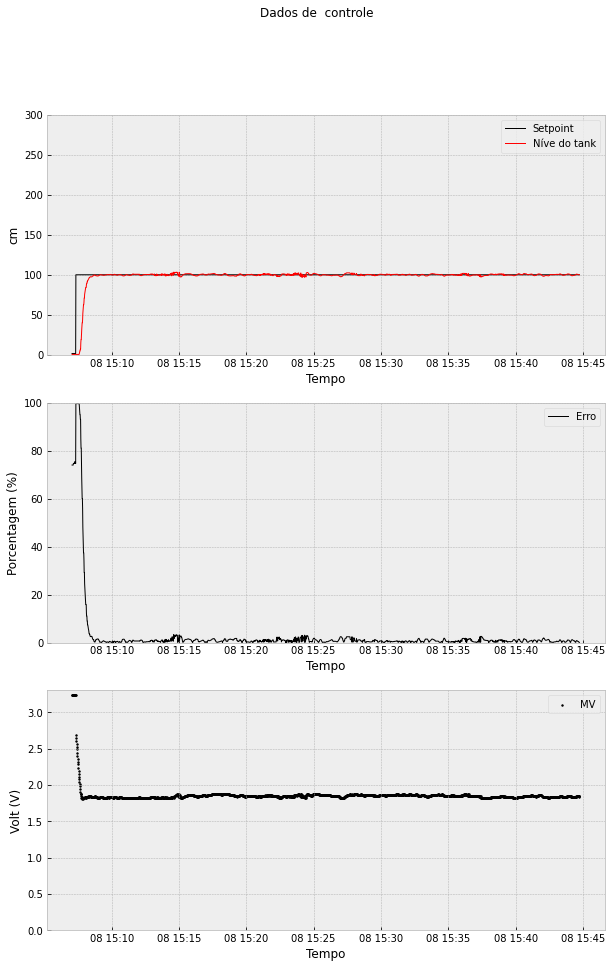

In [9]:
plt.style.use('bmh')

fig = plt.figure(figsize=(10,15))
fig.suptitle('Dados de  controle')

fig.add_subplot(311)
plt.plot(tempo, Setpoint, label = 'Setpoint', color = 'black',linewidth=1.0)
plt.plot(tempo, Nivel_tank, label = 'Níve do tank', color = 'red', linewidth=1.0)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('cm')
plt.ylim(ymin = 0, ymax= 300)
plt.grid(True)

fig.add_subplot(312)
plt.plot(tempo, erro, label = 'Erro', color = 'black', linewidth=1.0)
plt.ylim(ymin = 0, ymax= 100)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('Porcentagem (%)')

fig.add_subplot(313)
plt.scatter(tempo, Saida, label = 'MV', s= 2, color = 'black', linewidth=1.0)
plt.ylim(ymin = 0, ymax= 3.3)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('Volt (V)')

figcontrole = plt.gcf()

plt.show()

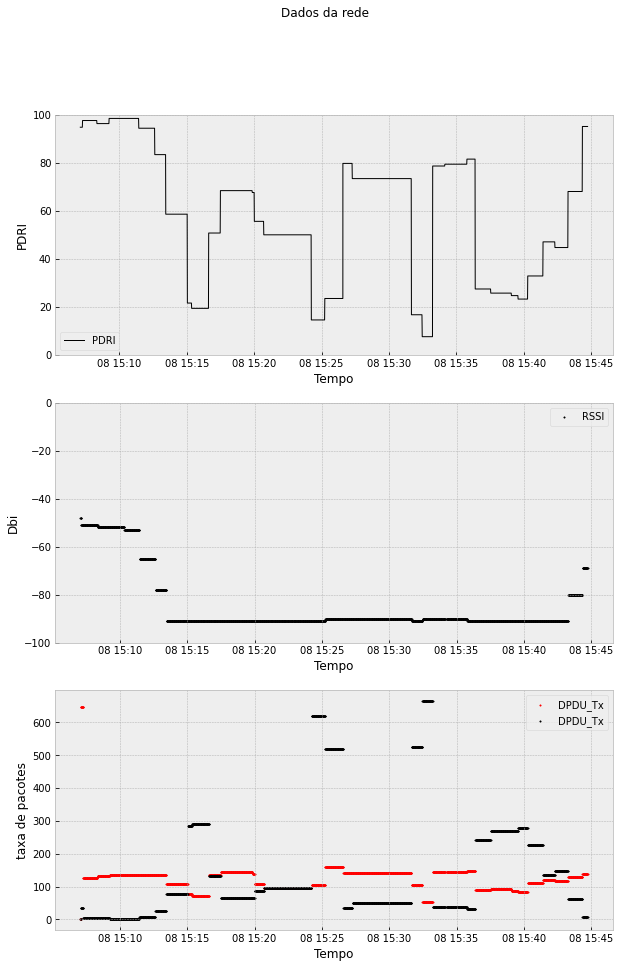

In [10]:
fig = plt.figure(figsize=(10,15))
fig.suptitle('Dados da rede')

fig.add_subplot(311)
plt.plot(tempo_rede, PDRI, label = 'PDRI', color = 'black', linewidth=1.0)
plt.ylim(ymin = 0, ymax= 100)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('PDRI')

fig.add_subplot(312)
plt.scatter(tempo_rede, RSSI_rede, label = 'RSSI', s= 2, color = 'black')
plt.ylim(ymin = -100, ymax= 0)
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('Dbi')

fig.add_subplot(313)
plt.scatter(tempo_rede, DPDU_Tx, label = 'DPDU_Tx', s= 2, color = 'red')
plt.scatter(tempo_rede, DPDU_Tx_Fail, label = 'DPDU_Tx', s= 2, color = 'black')
plt.legend() #legenda do gráfico
plt.xlabel('Tempo')
plt.ylabel('taxa de pacotes')

figrede = plt.gcf() 
plt.show()


Salvando gráficos

In [11]:

figrede.savefig('dados da rede.pdf', format='pdf')
figcontrole.savefig('dados de controle.pdf', format='pdf')